### Mini batch Task01
- 다이아몬드의 특성을 회귀분석하여, 예상 가격을 예측한다.

In [136]:
import pandas as pd

d_df = pd.read_csv('./datasets/diamond.csv')
d_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [137]:
pre_d_df = d_df.drop(labels=['Unnamed: 0'], axis=1)
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [138]:
pre_d_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [139]:
pre_d_df.duplicated().sum()

149

In [140]:
pre_d_df= pre_d_df.drop_duplicates().reset_index(drop=True)
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53789,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53790,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53791,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53792,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [141]:
pre_d_df.cut.value_counts()

cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64

In [142]:
pre_d_df.color.value_counts()

color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64

In [143]:
pre_d_df.clarity.value_counts()

clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

In [144]:
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53789,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53790,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53791,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53792,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


cut은 labelencoding  
color, clarity 는 one_hot_encoding

In [145]:
from sklearn.preprocessing import LabelEncoder

columns = ['cut']

label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(pre_d_df[column])
    label_encoders[column] = encoder.classes_
    pre_d_df[column] = result

label_encoders

{'cut': array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)}

In [146]:
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53789,0.72,2,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53790,0.72,1,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53791,0.70,4,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53792,0.86,3,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [147]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

one_hot_encoder = OneHotEncoder(sparse_output=False)
result= one_hot_encoder.fit_transform(pre_d_df[['color']])

pre_d_df = pd.concat([pre_d_df, pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)], axis =1 )
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z,"(D,)","(E,)","(F,)","(G,)","(H,)","(I,)","(J,)"
0,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53789,0.72,2,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,0,0,0,0
53790,0.72,1,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,0,0,0,0
53791,0.70,4,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,1,0,0,0,0,0,0
53792,0.86,3,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0


In [148]:
pre_d_df= pre_d_df.drop(labels=['color'], axis=1)
pre_d_df

,carat,cut,clarity,depth,table,price,x,y,z,"(D,)","(E,)","(F,)","(G,)","(H,)","(I,)","(J,)"
0,0.23,2,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53789,0.72,2,SI1,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,0,0,0,0
53790,0.72,1,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,0,0,0,0
53791,0.70,4,SI1,62.8,60.0,2757,5.66,5.68,3.56,1,0,0,0,0,0,0
53792,0.86,3,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0


In [149]:
pre_d_df.columns = ['carat', 'cut','clarity','depth','table','price','x','y','z','D','E','F','G','H','I','J']

In [150]:
pre_d_df

,carat,cut,clarity,depth,table,price,x,y,z,D,E,F,G,H,I,J
0,0.23,2,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53789,0.72,2,SI1,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,0,0,0,0
53790,0.72,1,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,0,0,0,0
53791,0.70,4,SI1,62.8,60.0,2757,5.66,5.68,3.56,1,0,0,0,0,0,0
53792,0.86,3,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0


In [151]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

one_hot_encoder = OneHotEncoder(sparse_output=False)
result= one_hot_encoder.fit_transform(pre_d_df[['clarity']])

pre_d_df = pd.concat([pre_d_df, pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)], axis =1 )
pre_d_df

,carat,cut,clarity,depth,table,price,x,y,z,D,...,I,J,"(I1,)","(IF,)","(SI1,)","(SI2,)","(VS1,)","(VS2,)","(VVS1,)","(VVS2,)"
0,0.23,2,SI2,61.5,55.0,326,3.95,3.98,2.43,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,3,SI1,59.8,61.0,326,3.89,3.84,2.31,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,1,VS1,56.9,65.0,327,4.05,4.07,2.31,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,3,VS2,62.4,58.0,334,4.20,4.23,2.63,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,1,SI2,63.3,58.0,335,4.34,4.35,2.75,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53789,0.72,2,SI1,60.8,57.0,2757,5.75,5.76,3.50,1,...,0,0,0,0,1,0,0,0,0,0
53790,0.72,1,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,...,0,0,0,0,1,0,0,0,0,0
53791,0.70,4,SI1,62.8,60.0,2757,5.66,5.68,3.56,1,...,0,0,0,0,1,0,0,0,0,0
53792,0.86,3,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,...,0,0,0,0,0,1,0,0,0,0


In [152]:
pre_d_df.columns = ['carat',
                    'cut',
                    'clarity',
                    'depth',
                    'table',
                    'price',
                    'x','y','z'
                    ,'D','E','F','G','H','I','J',
                   'I1','IF','SI1','SI2','VS1','VS2','VVS1','VVS2']

In [153]:
pre_d_df

,carat,cut,clarity,depth,table,price,x,y,z,D,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,2,SI2,61.5,55.0,326,3.95,3.98,2.43,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,3,SI1,59.8,61.0,326,3.89,3.84,2.31,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,1,VS1,56.9,65.0,327,4.05,4.07,2.31,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,3,VS2,62.4,58.0,334,4.20,4.23,2.63,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,1,SI2,63.3,58.0,335,4.34,4.35,2.75,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53789,0.72,2,SI1,60.8,57.0,2757,5.75,5.76,3.50,1,...,0,0,0,0,1,0,0,0,0,0
53790,0.72,1,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,...,0,0,0,0,1,0,0,0,0,0
53791,0.70,4,SI1,62.8,60.0,2757,5.66,5.68,3.56,1,...,0,0,0,0,1,0,0,0,0,0
53792,0.86,3,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,...,0,0,0,0,0,1,0,0,0,0


In [154]:
pre_d_df = pre_d_df.drop(labels=['clarity'], axis=1)
pre_d_df

,carat,cut,depth,table,price,x,y,z,D,E,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,2,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,3,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,1,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,3,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,1,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53789,0.72,2,60.8,57.0,2757,5.75,5.76,3.50,1,0,...,0,0,0,0,1,0,0,0,0,0
53790,0.72,1,63.1,55.0,2757,5.69,5.75,3.61,1,0,...,0,0,0,0,1,0,0,0,0,0
53791,0.70,4,62.8,60.0,2757,5.66,5.68,3.56,1,0,...,0,0,0,0,1,0,0,0,0,0
53792,0.86,3,61.0,58.0,2757,6.15,6.12,3.74,0,0,...,0,0,0,0,0,1,0,0,0,0


<Axes: >

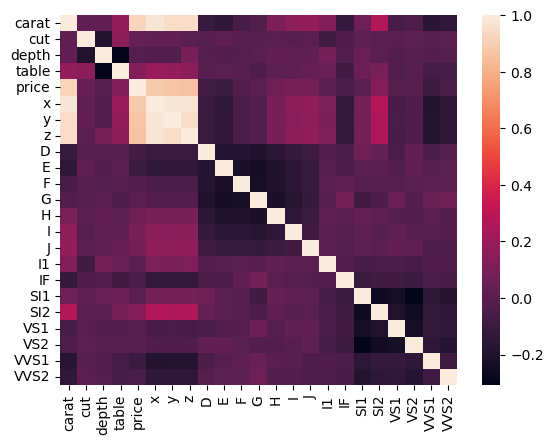

In [155]:
import seaborn as sns

sns.heatmap(pre_d_df.corr())

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>,
        <Axes: title={'center': 'z'}>, <Axes: title={'center': 'D'}>,
        <Axes: title={'center': 'E'}>],
       [<Axes: title={'center': 'F'}>, <Axes: title={'center': 'G'}>,
        <Axes: title={'center': 'H'}>, <Axes: title={'center': 'I'}>,
        <Axes: title={'center': 'J'}>],
       [<Axes: title={'center': 'I1'}>, <Axes: title={'center': 'IF'}>,
        <Axes: title={'center': 'SI1'}>, <Axes: title={'center': 'SI2'}>,
        <Axes: title={'center': 'VS1'}>],
       [<Axes: title={'center': 'VS2'}>,
        <Axes: title={'center': 'VVS1'}>,
        <Axes: title={'center': 'VVS2'}>, <Axes: >, <Axes: >]],
      dtype=object)

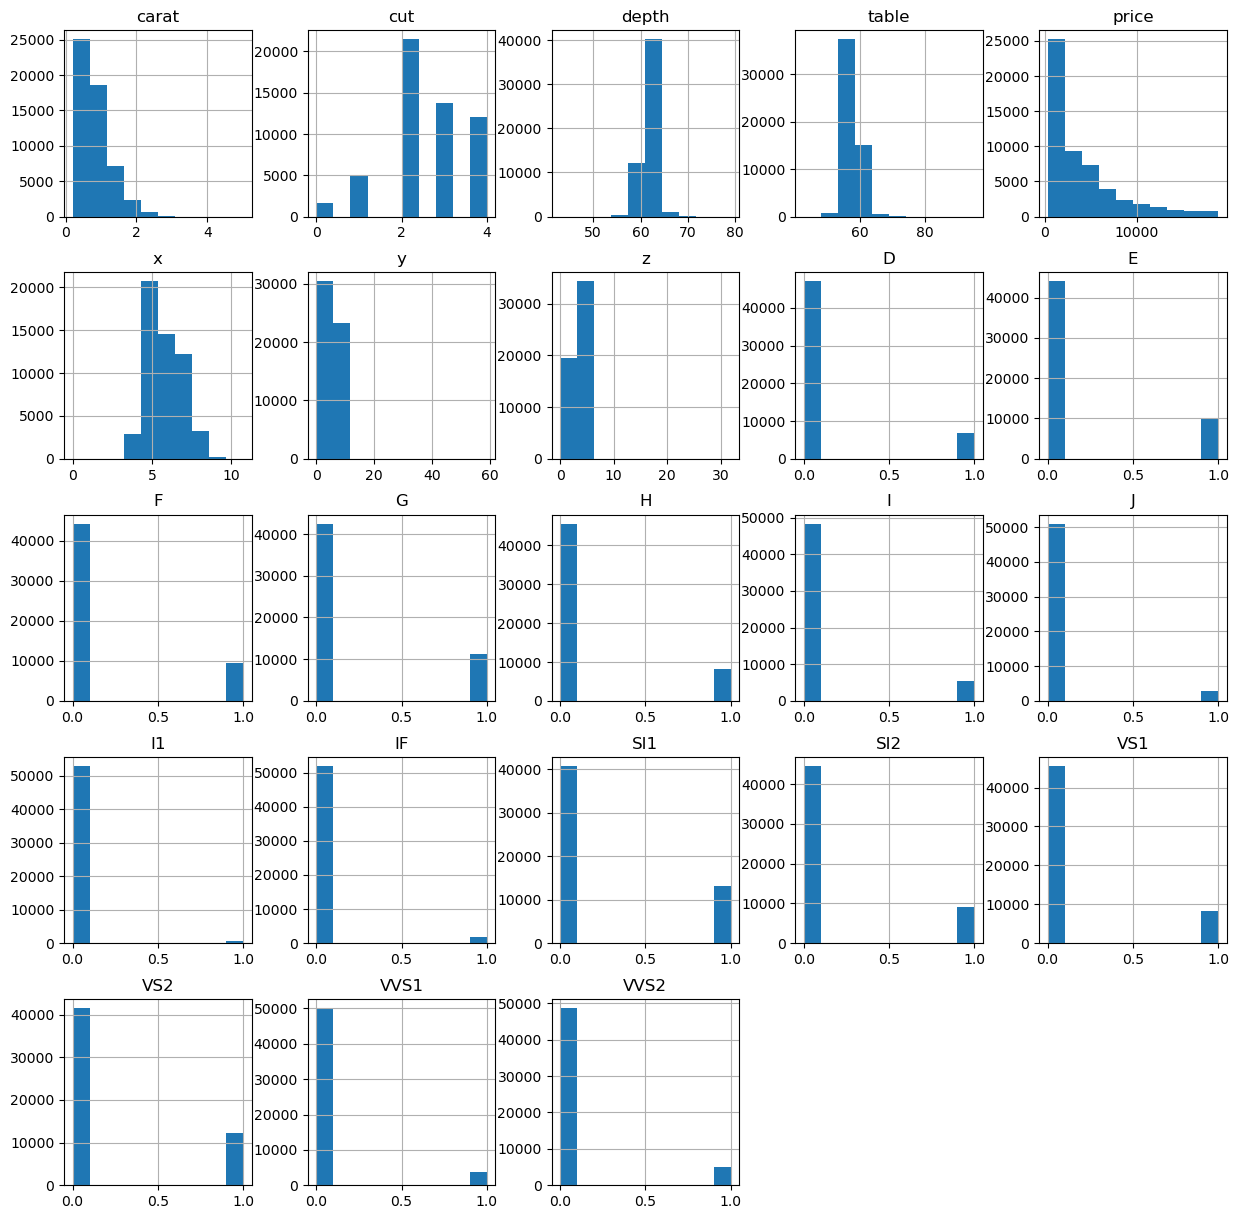

In [156]:
pre_d_df.hist(figsize=(15,15))

In [157]:
pre_d_df.corr()['price'].sort_values(ascending=False)[1:]

carat    0.921548
x        0.884504
y        0.865395
z        0.861208
SI2      0.127639
table    0.126566
I        0.096283
J        0.081899
H        0.058766
cut      0.040196
SI1      0.008946
G        0.008811
I1      -0.000231
VS2     -0.000724
VS1     -0.009694
depth   -0.011048
F       -0.023989
IF      -0.049342
VVS2    -0.052215
D       -0.072085
VVS1    -0.095106
E       -0.100852
Name: price, dtype: float64

<Axes: >

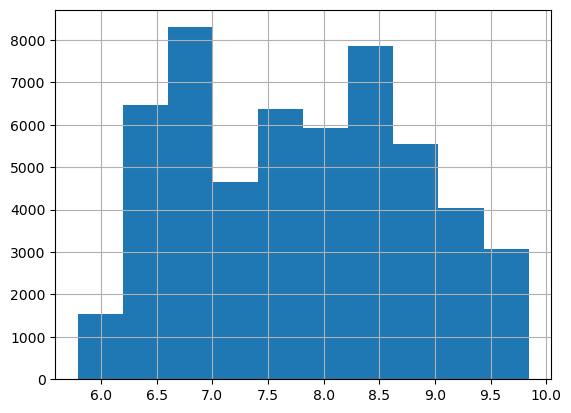

In [158]:
np.log1p(pre_d_df['price']).hist()

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>,
        <Axes: title={'center': 'z'}>, <Axes: title={'center': 'D'}>,
        <Axes: title={'center': 'E'}>],
       [<Axes: title={'center': 'F'}>, <Axes: title={'center': 'G'}>,
        <Axes: title={'center': 'H'}>, <Axes: title={'center': 'I'}>,
        <Axes: title={'center': 'J'}>],
       [<Axes: title={'center': 'I1'}>, <Axes: title={'center': 'IF'}>,
        <Axes: title={'center': 'SI1'}>, <Axes: title={'center': 'SI2'}>,
        <Axes: title={'center': 'VS1'}>],
       [<Axes: title={'center': 'VS2'}>,
        <Axes: title={'center': 'VVS1'}>,
        <Axes: title={'center': 'VVS2'}>, <Axes: >, <Axes: >]],
      dtype=object)

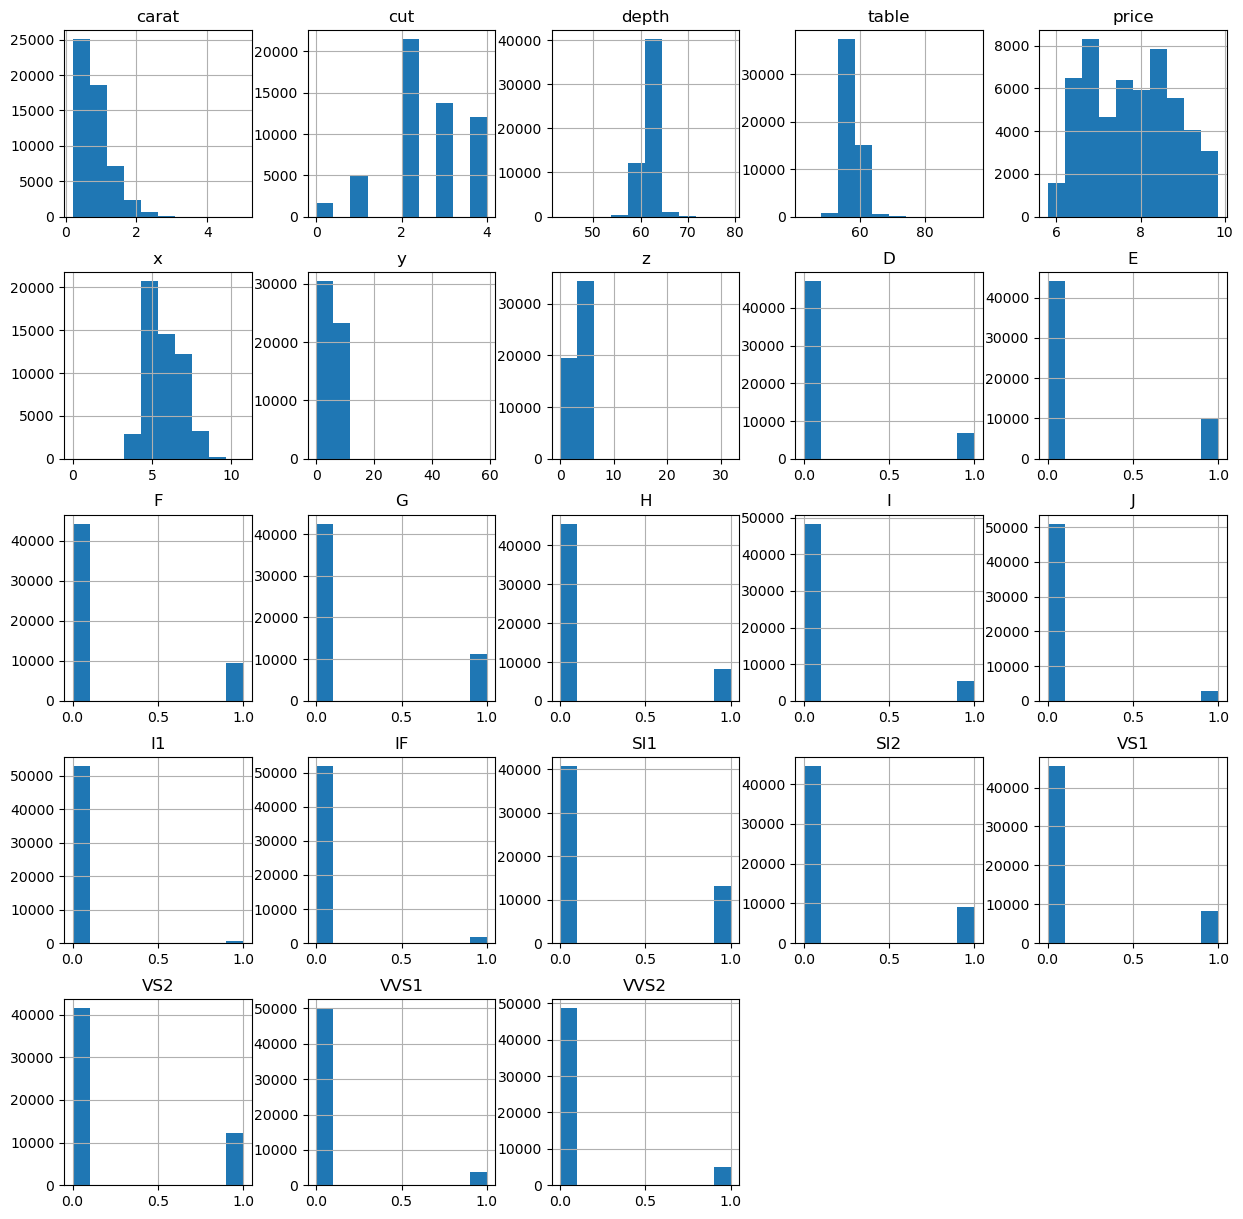

In [159]:
pre_d_df.loc[:, 'price'] = np.log1p(pre_d_df['price'])
pre_d_df.hist(figsize=(15,15))

In [160]:
pre_d_df.corr()['price'].sort_values(ascending=False)[1:]

x        0.958272
y        0.936325
z        0.935414
carat    0.920418
SI2      0.169085
table    0.157512
J        0.083348
I        0.076925
H        0.055145
SI1      0.034070
I1       0.027988
cut      0.023102
G        0.001636
depth    0.000764
F       -0.011091
VS2     -0.012309
VS1     -0.025554
D       -0.063019
IF      -0.069512
VVS2    -0.081098
E       -0.096189
VVS1    -0.123109
Name: price, dtype: float64

In [161]:
pre_d_df

,carat,cut,depth,table,price,x,y,z,D,E,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,2,61.5,55.0,5.789960,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,3,59.8,61.0,5.789960,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,1,56.9,65.0,5.793014,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,3,62.4,58.0,5.814131,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,1,63.3,58.0,5.817111,4.34,4.35,2.75,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53789,0.72,2,60.8,57.0,7.922261,5.75,5.76,3.50,1,0,...,0,0,0,0,1,0,0,0,0,0
53790,0.72,1,63.1,55.0,7.922261,5.69,5.75,3.61,1,0,...,0,0,0,0,1,0,0,0,0,0
53791,0.70,4,62.8,60.0,7.922261,5.66,5.68,3.56,1,0,...,0,0,0,0,1,0,0,0,0,0
53792,0.86,3,61.0,58.0,7.922261,6.15,6.12,3.74,0,0,...,0,0,0,0,0,1,0,0,0,0


In [162]:
pre_d_df['target'] = pre_d_df.price
pre_d_df = pre_d_df.drop(labels=['price'], axis=1)
pre_d_df

,carat,cut,depth,table,x,y,z,D,E,F,...,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,target
0,0.23,2,61.5,55.0,3.95,3.98,2.43,0,1,0,...,0,0,0,0,1,0,0,0,0,5.789960
1,0.21,3,59.8,61.0,3.89,3.84,2.31,0,1,0,...,0,0,0,1,0,0,0,0,0,5.789960
2,0.23,1,56.9,65.0,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,1,0,0,0,5.793014
3,0.29,3,62.4,58.0,4.20,4.23,2.63,0,0,0,...,0,0,0,0,0,0,1,0,0,5.814131
4,0.31,1,63.3,58.0,4.34,4.35,2.75,0,0,0,...,1,0,0,0,1,0,0,0,0,5.817111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53789,0.72,2,60.8,57.0,5.75,5.76,3.50,1,0,0,...,0,0,0,1,0,0,0,0,0,7.922261
53790,0.72,1,63.1,55.0,5.69,5.75,3.61,1,0,0,...,0,0,0,1,0,0,0,0,0,7.922261
53791,0.70,4,62.8,60.0,5.66,5.68,3.56,1,0,0,...,0,0,0,1,0,0,0,0,0,7.922261
53792,0.86,3,61.0,58.0,6.15,6.12,3.74,0,0,0,...,0,0,0,0,1,0,0,0,0,7.922261


In [163]:
import statsmodels.api as sm

features, targets = pre_d_df.iloc[:, 0:2], pre_d_df.target

print(sm.OLS(targets, features).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                          3.828e+05
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:13:04   Log-Likelihood:                     -1.1395e+05
No. Observations:               53794   AIC:                                  2.279e+05
Df Residuals:                   53792   BIC:                                  2.279e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [130]:
columns = ['x','y','z','carat','price']

pre_d_df = pre_d_df.loc[:, columns]
pre_d_df

,x,y,z,carat,price
0,3.95,3.98,2.43,0.23,5.789960
1,3.89,3.84,2.31,0.21,5.789960
2,4.05,4.07,2.31,0.23,5.793014
3,4.20,4.23,2.63,0.29,5.814131
4,4.34,4.35,2.75,0.31,5.817111
...,...,...,...,...,...
53789,5.75,5.76,3.50,0.72,7.922261
53790,5.69,5.75,3.61,0.72,7.922261
53791,5.66,5.68,3.56,0.70,7.922261
53792,6.15,6.12,3.74,0.86,7.922261


In [164]:
features.values

array([[0.23, 2.  ],
       [0.21, 3.  ],
       [0.23, 1.  ],
       ...,
       [0.7 , 4.  ],
       [0.86, 3.  ],
       [0.75, 2.  ]])

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_VIF(features):
    vif = pd.DataFrame()
    vif['score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [168]:
display(feature_engineering_VIF(features))

,score,feature
0,2.793018,carat
1,2.793018,cut


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

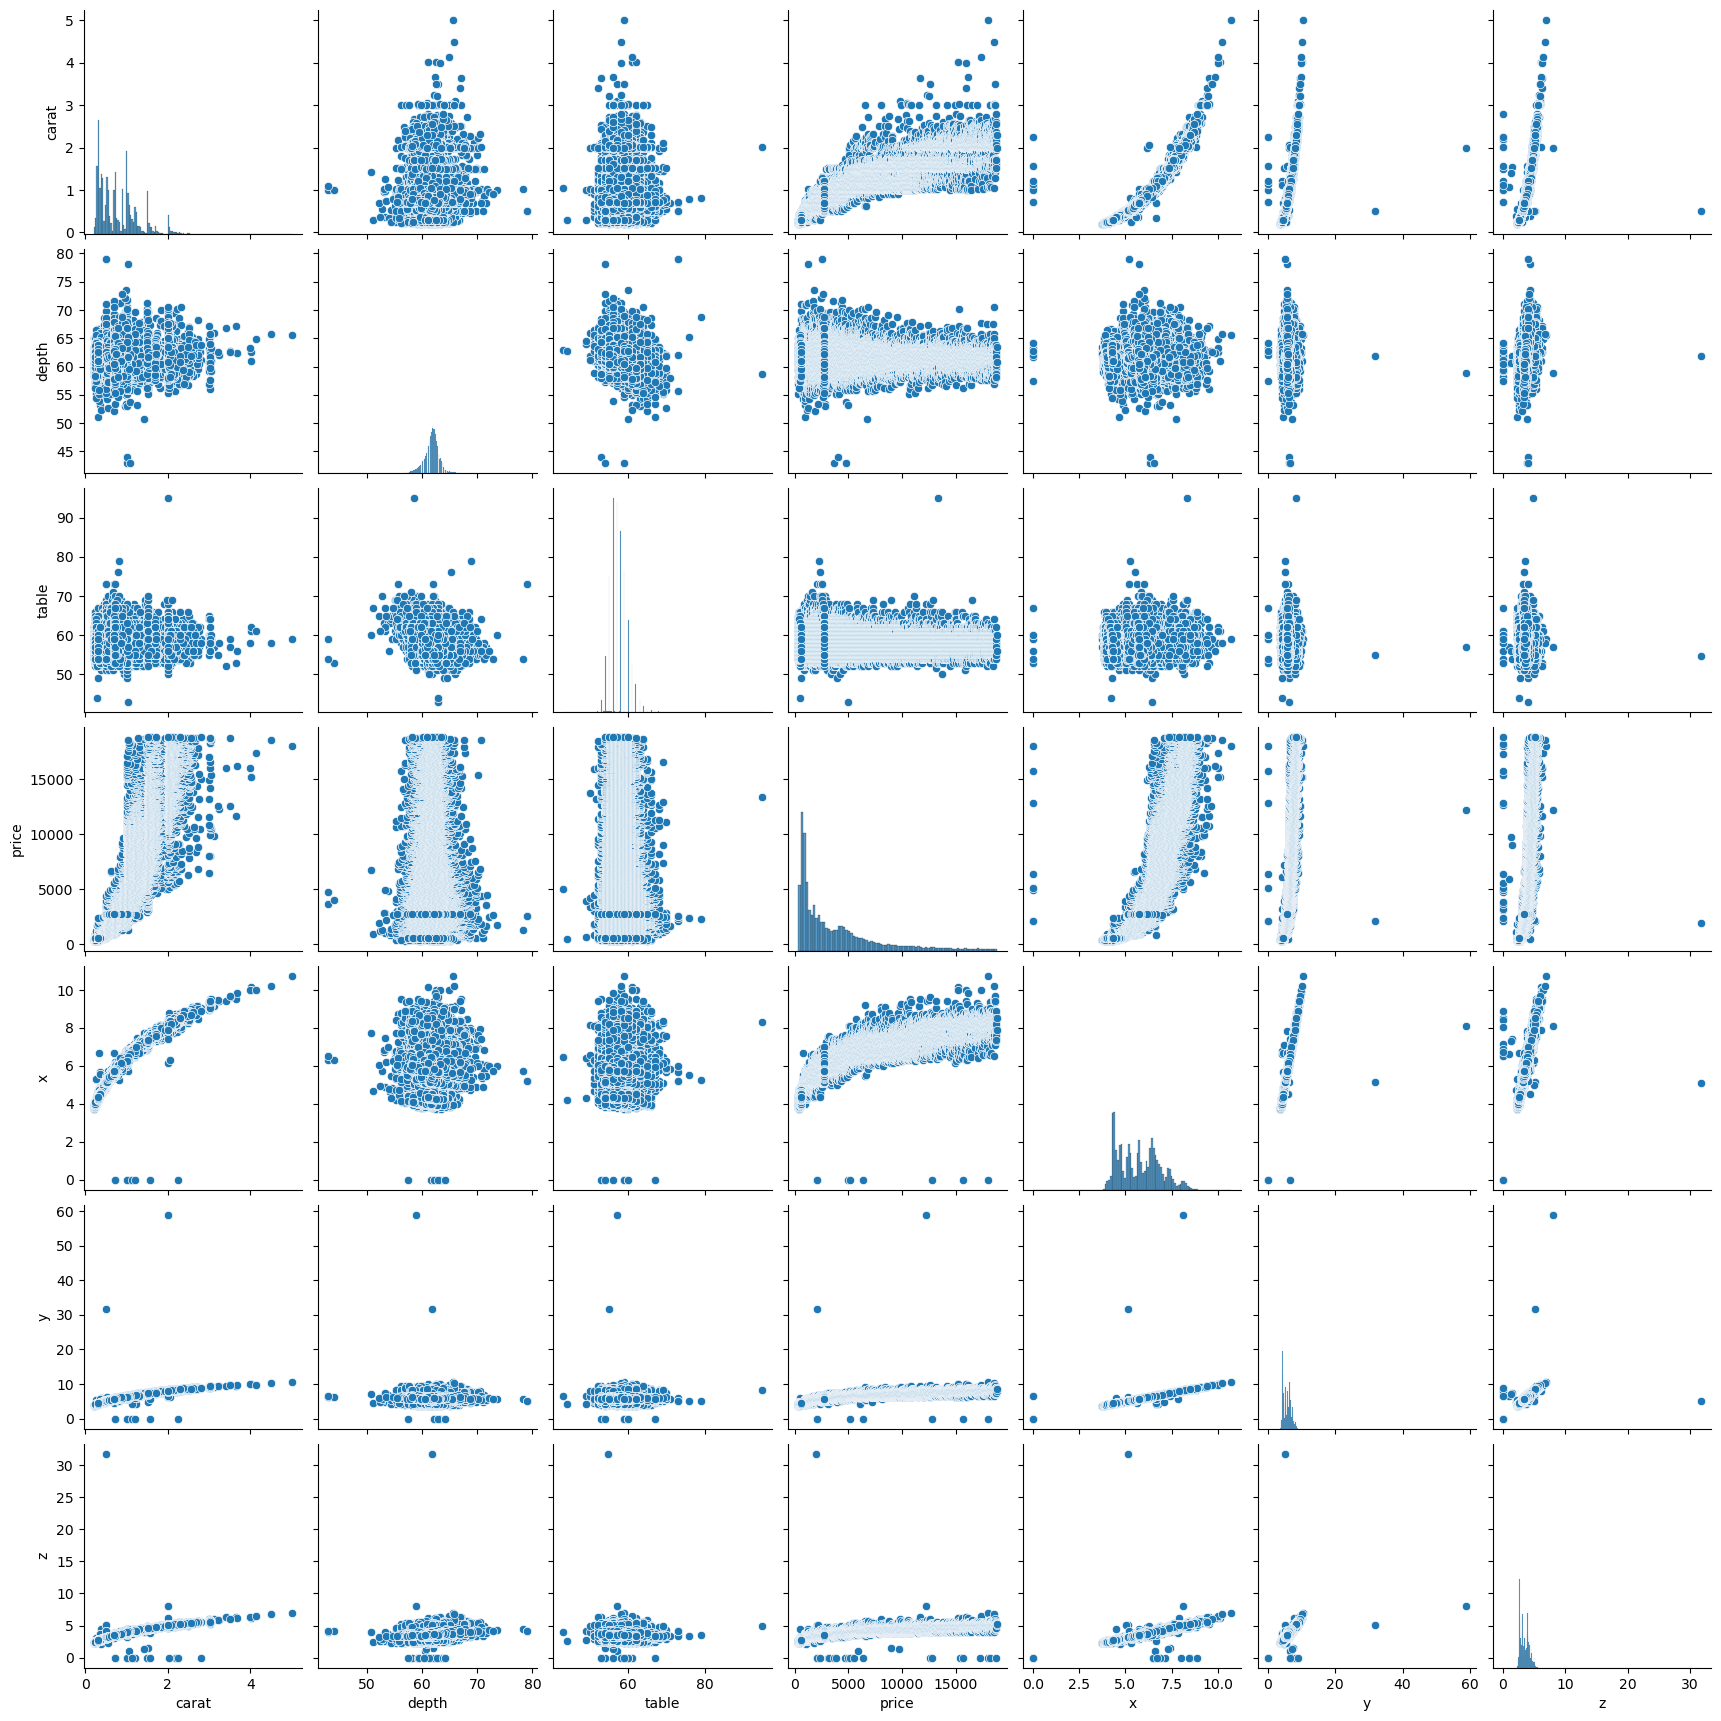

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

sns.pairplot(d_df[columns])
plt.show()

In [131]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(124)

features, targets = pre_d_df.iloc[:,:-1], pre_d_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train =  torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test =  torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)


td = TensorDataset(X_train, y_train)
dl = DataLoader(td, batch_size=500, shuffle=True)

l_r = Linear(4, 1)
optimizer = SGD(l_r.parameters(), lr = 0.0001)

epochs = 10000

for epoch in range(1, epochs+1):
    for i, samples in enumerate(dl):
        X_train, y_train = samples

        H = l_r(X_train)
        loss = mse_loss(H, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs}, Batch: {i+1}/{len(dl)}, ', end='')
            for i, w in enumerate(list(l_r.parameters())[0][0]):
                print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
            print(f'b: {np.round(list(l_r.parameters())[1].item(), 4)}')
            print(f'loss: {np.round(loss.item(), 4)}')

Epoch: 100/10000, Batch: 1/87, W1: 0.2494, W2: 0.6429, W3: 0.6982, W4: -0.194, b: 0.2688
loss: 0.4318
Epoch: 100/10000, Batch: 2/87, W1: 0.2494, W2: 0.6429, W3: 0.6982, W4: -0.1941, b: 0.2688
loss: 0.389
Epoch: 100/10000, Batch: 3/87, W1: 0.2494, W2: 0.6429, W3: 0.6982, W4: -0.1941, b: 0.2688
loss: 0.2581
Epoch: 100/10000, Batch: 4/87, W1: 0.2494, W2: 0.6429, W3: 0.6982, W4: -0.1941, b: 0.2688
loss: 0.2219
Epoch: 100/10000, Batch: 5/87, W1: 0.2495, W2: 0.6429, W3: 0.6982, W4: -0.1941, b: 0.2688
loss: 0.247
Epoch: 100/10000, Batch: 6/87, W1: 0.2494, W2: 0.6429, W3: 0.6982, W4: -0.1942, b: 0.2688
loss: 0.2456
Epoch: 100/10000, Batch: 7/87, W1: 0.2495, W2: 0.643, W3: 0.6982, W4: -0.1942, b: 0.2689
loss: 0.2449
Epoch: 100/10000, Batch: 8/87, W1: 0.2494, W2: 0.6429, W3: 0.6982, W4: -0.1942, b: 0.2689
loss: 0.2494
Epoch: 100/10000, Batch: 9/87, W1: 0.2495, W2: 0.643, W3: 0.6982, W4: -0.1942, b: 0.2689
loss: 0.3628
Epoch: 100/10000, Batch: 10/87, W1: 0.2495, W2: 0.643, W3: 0.6982, W4: -0.1943

In [132]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE))

In [133]:
y_test = y_test.detach().numpy()

H = l_r(X_test)
prediction = H.detach().numpy()

In [134]:
get_evaluation(y_test, prediction)

MSE: 0.0836, RMSE: 0.2892, MSLE: 0.0009, RMSLE: 0.0306
